In [19]:
import numpy as np
from scipy.sparse import lil_matrix
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import pylops

filter_size = 9
low_pass_filter = np.ones((filter_size, filter_size))/9

image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with your actual image
height, width = image.shape
x = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

# Specify the scaling factors (e.g., reduce by half)
scale_x = 0.1  # Horizontal scale factor
scale_y = 0.1  # Vertical scale factor

x = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_AREA)

image_shape = x.shape

padded = cv2.copyMakeBorder(x, 4, 4, 4, 4, cv2.BORDER_REFLECT, None, value = 0) 
image_shape = padded.shape
# x = np.load("python.npy")[::5, ::5, 0]
# image_shape = x.shape

In [20]:
image_shape

(64, 59)

In [21]:
kernel_shape = 9
h = np.ones((kernel_shape, kernel_shape))/(kernel_shape**2)

In [22]:
Cop = pylops.signalprocessing.Convolve2D(
    (image_shape[0], image_shape[1]), h=h, offset=(kernel_shape // 2, kernel_shape // 2), dtype="float32"
)
Cop

<3776x3776 Convolve2D with dtype=float32>

In [23]:
blur_deneme = Cop * padded

In [24]:
blur_deneme.shape

(64, 59)

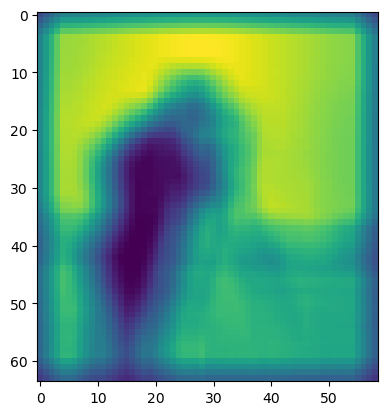

In [25]:
plt.imshow(blur_deneme)

In [26]:
awgn_noise = 5 * np.random.normal(0, 1, blur_deneme.shape)

In [27]:
blur_final = blur_deneme + awgn_noise

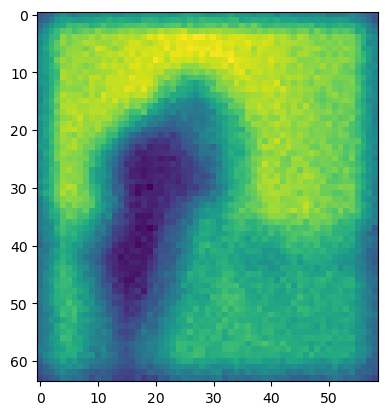

In [28]:
plt.imshow(blur_final)

In [29]:
blur_final.shape

(64, 59)

In [30]:
blur_vec = blur_final.reshape((-1, 1))

In [31]:
import hista

In [32]:
Cop.shape

(3776, 3776)

In [33]:
A = Cop.todense()

In [34]:
A.shape

(3776, 3776)

In [35]:
blur_vec.shape

(3776, 1)

In [36]:
x, obj_vals = hista.FastHISTA(A, blur_vec, lam=0.01, gamma=1.0, line_search=False, max_iter=200)

100%|██████████| 200/200 [00:03<00:00, 64.79it/s]

Reached maximum iterations without full convergence.


In [37]:
x = x.reshape(image_shape)
x_unpadded = x[4:-4, 4:-4]

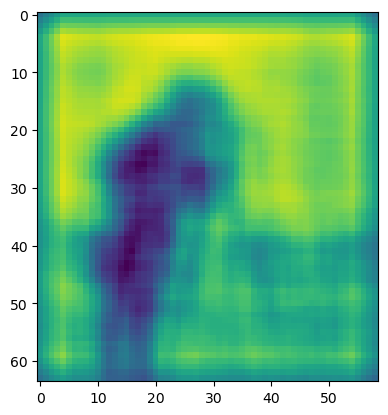

In [38]:
plt.imshow(x)

In [39]:
image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with your actual image
height, width = image.shape
original_image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

# Specify the scaling factors (e.g., reduce by half)
scale_x = 0.1  # Horizontal scale factor
scale_y = 0.1  # Vertical scale factor

original_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_AREA)

mse_loss = (np.square(x_unpadded - original_image)).mean()

In [40]:
print(mse_loss)

693.651751110783
